In [140]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from umap import UMAP
import plotly.express as px
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

In [141]:
t6_df = pd.read_csv('./t6.csv', sep=',', header=0, index_col=0)
t6_df.columns

Index(['Stems', 'Branches', 'Length', 'AverageBifurcationAngleLocal',
       'AverageBifurcationAngleRemote', 'HausdorffDimension'],
      dtype='object')

In [142]:
t1_grp_df = pd.read_csv('./t1_grp.csv', sep=',', header=0, index_col=0)
df = t1_grp_df[['Stems', 'Branches', 'Length', 'AverageBifurcationAngleLocal',
       'AverageBifurcationAngleRemote', 'HausdorffDimension']]
df = t1_grp_df
hue_type = 'BrainRgn'
labels_ori = t1_grp_df[['BrainRgn', 'Age', 'Sex']]
# 'BrainRgn', 'Age', 'Sex'
# labels = df['Stems'].copy()

for i in labels_ori.index:
    labels_ori.loc[i,'Age'] = int(labels_ori.loc[i,'Age']/5)*5

print('ori labels: ',labels_ori[hue_type].unique())
print(labels_ori[hue_type].value_counts(), '\n')

# 1
# labels = labels_ori.loc[~labels_ori.BrainRgn.isin(['SMFG', 'SMIFG','SFG','MTG','IFG']), [hue_type]]
# labels_ori = labels_ori[~labels_ori.BrainRgn.isin(['SMFG', 'SMIFG','SFG','MTG','IFG'])]

# 2
labels = labels_ori.loc[labels_ori.BrainRgn.isin(['PL','IPL']), [hue_type]]
labels_ori = labels_ori[labels_ori.BrainRgn.isin(['PL','IPL'])]

print('after labels: ', labels[hue_type].unique())
print(labels[hue_type].value_counts())
labels

D:\Anconda\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ori labels:  ['MFG' 'SFG' 'IPL' 'IFG' 'STG' 'MTG' 'TP' 'PL' 'SMFG' 'SMIFG']
MFG      304
TP       174
STG      131
IPL      112
PL        91
SFG       14
MTG       12
SMFG       5
SMIFG      5
IFG        4
Name: BrainRgn, dtype: int64 

after labels:  ['IPL' 'PL']
IPL    112
PL      91
Name: BrainRgn, dtype: int64


BrainRgn
Name                                                       
00068_P003_T01-S000_S(M)TG_R0460_WY-20220513_XJ...      IPL
00069_P003_T01-S000_S(M)TG_R0460_WY-20220513_XJ...      IPL
00073_P003_T02-S001_STG_R0460_GYC-20220516_GYC_...      IPL
00082_P003_T02-S003_STG_R0460_GYC-20220516_LJ_s...      IPL
00083_P003_T02-S003_STG_R0460_GYC-20220516_LJ_s...      IPL
...                                                     ...
01698_P018_T01-S014_SPL_R0460_LJ-20220728_YXQ_s...       PL
01699_P018_T01-S014_SPL_R0460_LJ-20220728_YXQ_s...       PL
01701_P018_T01-S014_SPL_R0460_LJ-20220728_YXQ_s...       PL
01738_P018_T01-S029_SPL_R0613_LJ-20220728_YXQ_s...       PL
01745_P018_T01-S029_SPL_R0613_LJ-20220728_YXQ_s...       PL

[203 rows x 1 columns]

In [143]:
labels_ori

BrainRgn  Age Sex
Name                                                                
00068_P003_T01-S000_S(M)TG_R0460_WY-20220513_XJ...      IPL   45   F
00069_P003_T01-S000_S(M)TG_R0460_WY-20220513_XJ...      IPL   45   F
00073_P003_T02-S001_STG_R0460_GYC-20220516_GYC_...      IPL   45   F
00082_P003_T02-S003_STG_R0460_GYC-20220516_LJ_s...      IPL   45   F
00083_P003_T02-S003_STG_R0460_GYC-20220516_LJ_s...      IPL   45   F
...                                                     ...  ...  ..
01698_P018_T01-S014_SPL_R0460_LJ-20220728_YXQ_s...       PL   40   F
01699_P018_T01-S014_SPL_R0460_LJ-20220728_YXQ_s...       PL   40   F
01701_P018_T01-S014_SPL_R0460_LJ-20220728_YXQ_s...       PL   40   F
01738_P018_T01-S029_SPL_R0613_LJ-20220728_YXQ_s...       PL   40   F
01745_P018_T01-S029_SPL_R0613_LJ-20220728_YXQ_s...       PL   40   F

[203 rows x 3 columns]

In [144]:
df = df.loc[labels.index,:]
df = df.iloc[:, 3:]
df

Nodes  SomaSurface  Stems  \
Name                                                                            
00068_P003_T01-S000_S(M)TG_R0460_WY-20220513_XJ...   1999      12.5664      9   
00069_P003_T01-S000_S(M)TG_R0460_WY-20220513_XJ...   2534   22167.1000     10   
00073_P003_T02-S001_STG_R0460_GYC-20220516_GYC_...   1666      12.5664      8   
00082_P003_T02-S003_STG_R0460_GYC-20220516_LJ_s...   1520      12.5664      8   
00083_P003_T02-S003_STG_R0460_GYC-20220516_LJ_s...   1891      12.5664     10   
...                                                   ...          ...    ...   
01698_P018_T01-S014_SPL_R0460_LJ-20220728_YXQ_s...    724      12.5664      8   
01699_P018_T01-S014_SPL_R0460_LJ-20220728_YXQ_s...   1490      12.5664     10   
01701_P018_T01-S014_SPL_R0460_LJ-20220728_YXQ_s...    906      12.5664      5   
01738_P018_T01-S029_SPL_R0613_LJ-20220728_YXQ_s...   1953      12.5664      9   
01745_P018_T01-S029_SPL_R0613_LJ-20220728_YXQ_s...   1065      12.5664      9   

                                                    Bifurcations  Branches  \
Name                                                                         
00068_P003_T01-S000_S(M)TG_R0460_WY-20220513_XJ...            40        87   
00069_P003_T01-S000_S(M)TG_R0460_WY-20220513_XJ...            62       132   
00073_P003_T02-S001_STG_R0460_GYC-20220516_GYC_...            34        74   
00082_P003_T02-S003_STG_R0460_GYC-20220516_LJ_s...            32        70   
00083_P003_T02-S003_STG_R0460_GYC-20220516_LJ_s...            36        80   
...                                                          ...       ...   
01698_P018_T01-S014_SPL_R0460_LJ-20220728_YXQ_s...            25        56   
01699_P018_T01-S014_SPL_R0460_LJ-20220728_YXQ_s...            31        70   
01701_P018_T01-S014_SPL_R0460_LJ-20220728_YXQ_s...            36        75   
01738_P018_T01-S029_SPL_R0613_LJ-20220728_YXQ_s...            45        98   
01745_P018_T01-S029_SPL_R0613_LJ-20220728_YXQ_s...            28        64   

                                                    Tips  OverallWidth  \
Name                                                                     
00068_P003_T01-S000_S(M)TG_R0460_WY-20220513_XJ...    48       197.340   
00069_P003_T01-S000_S(M)TG_R0460_WY-20220513_XJ...    71       235.060   
00073_P003_T02-S001_STG_R0460_GYC-20220516_GYC_...    41       212.980   
00082_P003_T02-S003_STG_R0460_GYC-20220516_LJ_s...    39       226.583   
00083_P003_T02-S003_STG_R0460_GYC-20220516_LJ_s...    45       233.680   
...                                                  ...           ...   
01698_P018_T01-S014_SPL_R0460_LJ-20220728_YXQ_s...    32       157.320   
01699_P018_T01-S014_SPL_R0460_LJ-20220728_YXQ_s...    40       188.140   
01701_P018_T01-S014_SPL_R0460_LJ-20220728_YXQ_s...    40       194.120   
01738_P018_T01-S029_SPL_R0613_LJ-20220728_YXQ_s...    54       310.791   
01745_P018_T01-S029_SPL_R0613_LJ-20220728_YXQ_s...    37       183.287   

                                                    OverallHeight  \
Name                                                                
00068_P003_T01-S000_S(M)TG_R0460_WY-20220513_XJ...        231.840   
00069_P003_T01-S000_S(M)TG_R0460_WY-20220513_XJ...        235.009   
00073_P003_T02-S001_STG_R0460_GYC-20220516_GYC_...        228.620   
00082_P003_T02-S003_STG_R0460_GYC-20220516_LJ_s...        230.818   
00083_P003_T02-S003_STG_R0460_GYC-20220516_LJ_s...        227.700   
...                                                           ...   
01698_P018_T01-S014_SPL_R0460_LJ-20220728_YXQ_s...        168.360   
01699_P018_T01-S014_SPL_R0460_LJ-20220728_YXQ_s...        176.640   
01701_P018_T01-S014_SPL_R0460_LJ-20220728_YXQ_s...        228.160   
01738_P018_T01-S029_SPL_R0613_LJ-20220728_YXQ_s...        270.946   
01745_P018_T01-S029_SPL_R0613_LJ-20220728_YXQ_s...        227.423   

                                                    OverallDepth  \
Name                                                  

In [145]:
x = df.values
x.shape

(203, 22)

In [146]:
std = StandardScaler()
pca = PCA(0.99)

In [147]:
x_std = std.fit_transform(x)
print('x_std shape: ', x_std.shape)
x_pca = pca.fit_transform(x_std) # 由x_std 改成了x
print('x_pca shape: ', x_pca.shape)

x_std shape:  (203, 22)
x_pca shape:  (203, 15)


In [148]:
x_std

array([[ 0.18791648, -0.55005195,  0.66555788, ...,  1.70919786,
         0.43079985,  0.16521365],
       [ 0.8570751 ,  7.32946924,  1.21255485, ..., -0.347629  ,
         0.20927346,  0.14249145],
       [-0.22858786, -0.55005195,  0.11856092, ..., -0.40603763,
         0.10184888, -0.84876445],
       ...,
       [-1.17916834, -0.55005195, -1.52242998, ...,  1.5963403 ,
        -0.15728525, -1.62781125],
       [ 0.13038134, -0.55005195,  0.66555788, ...,  0.82290722,
        -0.66240196,  1.26845753],
       [-0.9802969 , -0.55005195,  0.66555788, ...,  0.70136269,
         0.56544081, -0.2928821 ]])

In [149]:
x_pca

array([[-0.97092525, -1.11042032,  1.11514041, ..., -1.06260885,
        -0.5247363 ,  0.42975226],
       [ 4.25457733,  3.56931952, -1.1617775 , ...,  2.65965971,
        -0.00802443,  0.30363419],
       [-2.25664217, -0.58321159,  0.90826164, ...,  0.34883656,
         0.03909125,  0.01151469],
       ...,
       [-3.14257344,  0.11351233, -2.01468441, ...,  0.58529083,
        -0.04808637,  0.09518264],
       [ 0.57844804, -1.54701258,  0.05338918, ..., -0.21251499,
         0.08592892, -0.45189315],
       [-3.34103507,  0.25101258, -0.20472664, ...,  0.53657711,
        -0.30107578, -0.09575899]])

In [150]:
# df_std = pd.DataFrame(
#             x_std,
#             columns=df.columns, 
#             index=df.index
#             )
# df_std['hue'] = labels
# df_std

In [151]:
df['hue'] = labels
df

Nodes  SomaSurface  Stems  \
Name                                                                            
00068_P003_T01-S000_S(M)TG_R0460_WY-20220513_XJ...   1999      12.5664      9   
00069_P003_T01-S000_S(M)TG_R0460_WY-20220513_XJ...   2534   22167.1000     10   
00073_P003_T02-S001_STG_R0460_GYC-20220516_GYC_...   1666      12.5664      8   
00082_P003_T02-S003_STG_R0460_GYC-20220516_LJ_s...   1520      12.5664      8   
00083_P003_T02-S003_STG_R0460_GYC-20220516_LJ_s...   1891      12.5664     10   
...                                                   ...          ...    ...   
01698_P018_T01-S014_SPL_R0460_LJ-20220728_YXQ_s...    724      12.5664      8   
01699_P018_T01-S014_SPL_R0460_LJ-20220728_YXQ_s...   1490      12.5664     10   
01701_P018_T01-S014_SPL_R0460_LJ-20220728_YXQ_s...    906      12.5664      5   
01738_P018_T01-S029_SPL_R0613_LJ-20220728_YXQ_s...   1953      12.5664      9   
01745_P018_T01-S029_SPL_R0613_LJ-20220728_YXQ_s...   1065      12.5664      9   

                                                    Bifurcations  Branches  \
Name                                                                         
00068_P003_T01-S000_S(M)TG_R0460_WY-20220513_XJ...            40        87   
00069_P003_T01-S000_S(M)TG_R0460_WY-20220513_XJ...            62       132   
00073_P003_T02-S001_STG_R0460_GYC-20220516_GYC_...            34        74   
00082_P003_T02-S003_STG_R0460_GYC-20220516_LJ_s...            32        70   
00083_P003_T02-S003_STG_R0460_GYC-20220516_LJ_s...            36        80   
...                                                          ...       ...   
01698_P018_T01-S014_SPL_R0460_LJ-20220728_YXQ_s...            25        56   
01699_P018_T01-S014_SPL_R0460_LJ-20220728_YXQ_s...            31        70   
01701_P018_T01-S014_SPL_R0460_LJ-20220728_YXQ_s...            36        75   
01738_P018_T01-S029_SPL_R0613_LJ-20220728_YXQ_s...            45        98   
01745_P018_T01-S029_SPL_R0613_LJ-20220728_YXQ_s...            28        64   

                                                    Tips  OverallWidth  \
Name                                                                     
00068_P003_T01-S000_S(M)TG_R0460_WY-20220513_XJ...    48       197.340   
00069_P003_T01-S000_S(M)TG_R0460_WY-20220513_XJ...    71       235.060   
00073_P003_T02-S001_STG_R0460_GYC-20220516_GYC_...    41       212.980   
00082_P003_T02-S003_STG_R0460_GYC-20220516_LJ_s...    39       226.583   
00083_P003_T02-S003_STG_R0460_GYC-20220516_LJ_s...    45       233.680   
...                                                  ...           ...   
01698_P018_T01-S014_SPL_R0460_LJ-20220728_YXQ_s...    32       157.320   
01699_P018_T01-S014_SPL_R0460_LJ-20220728_YXQ_s...    40       188.140   
01701_P018_T01-S014_SPL_R0460_LJ-20220728_YXQ_s...    40       194.120   
01738_P018_T01-S029_SPL_R0613_LJ-20220728_YXQ_s...    54       310.791   
01745_P018_T01-S029_SPL_R0613_LJ-20220728_YXQ_s...    37       183.287   

                                                    OverallHeight  \
Name                                                                
00068_P003_T01-S000_S(M)TG_R0460_WY-20220513_XJ...        231.840   
00069_P003_T01-S000_S(M)TG_R0460_WY-20220513_XJ...        235.009   
00073_P003_T02-S001_STG_R0460_GYC-20220516_GYC_...        228.620   
00082_P003_T02-S003_STG_R0460_GYC-20220516_LJ_s...        230.818   
00083_P003_T02-S003_STG_R0460_GYC-20220516_LJ_s...        227.700   
...                                                           ...   
01698_P018_T01-S014_SPL_R0460_LJ-20220728_YXQ_s...        168.360   
01699_P018_T01-S014_SPL_R0460_LJ-20220728_YXQ_s...        176.640   
01701_P018_T01-S014_SPL_R0460_LJ-20220728_YXQ_s...        228.160   
01738_P018_T01-S029_SPL_R0613_LJ-20220728_YXQ_s...        270.946   
01745_P018_T01-S029_SPL_R0613_LJ-20220728_YXQ_s...        227.423   

                                                    OverallDepth  \
Name                                                  

<Figure size 1080x1080 with 0 Axes>

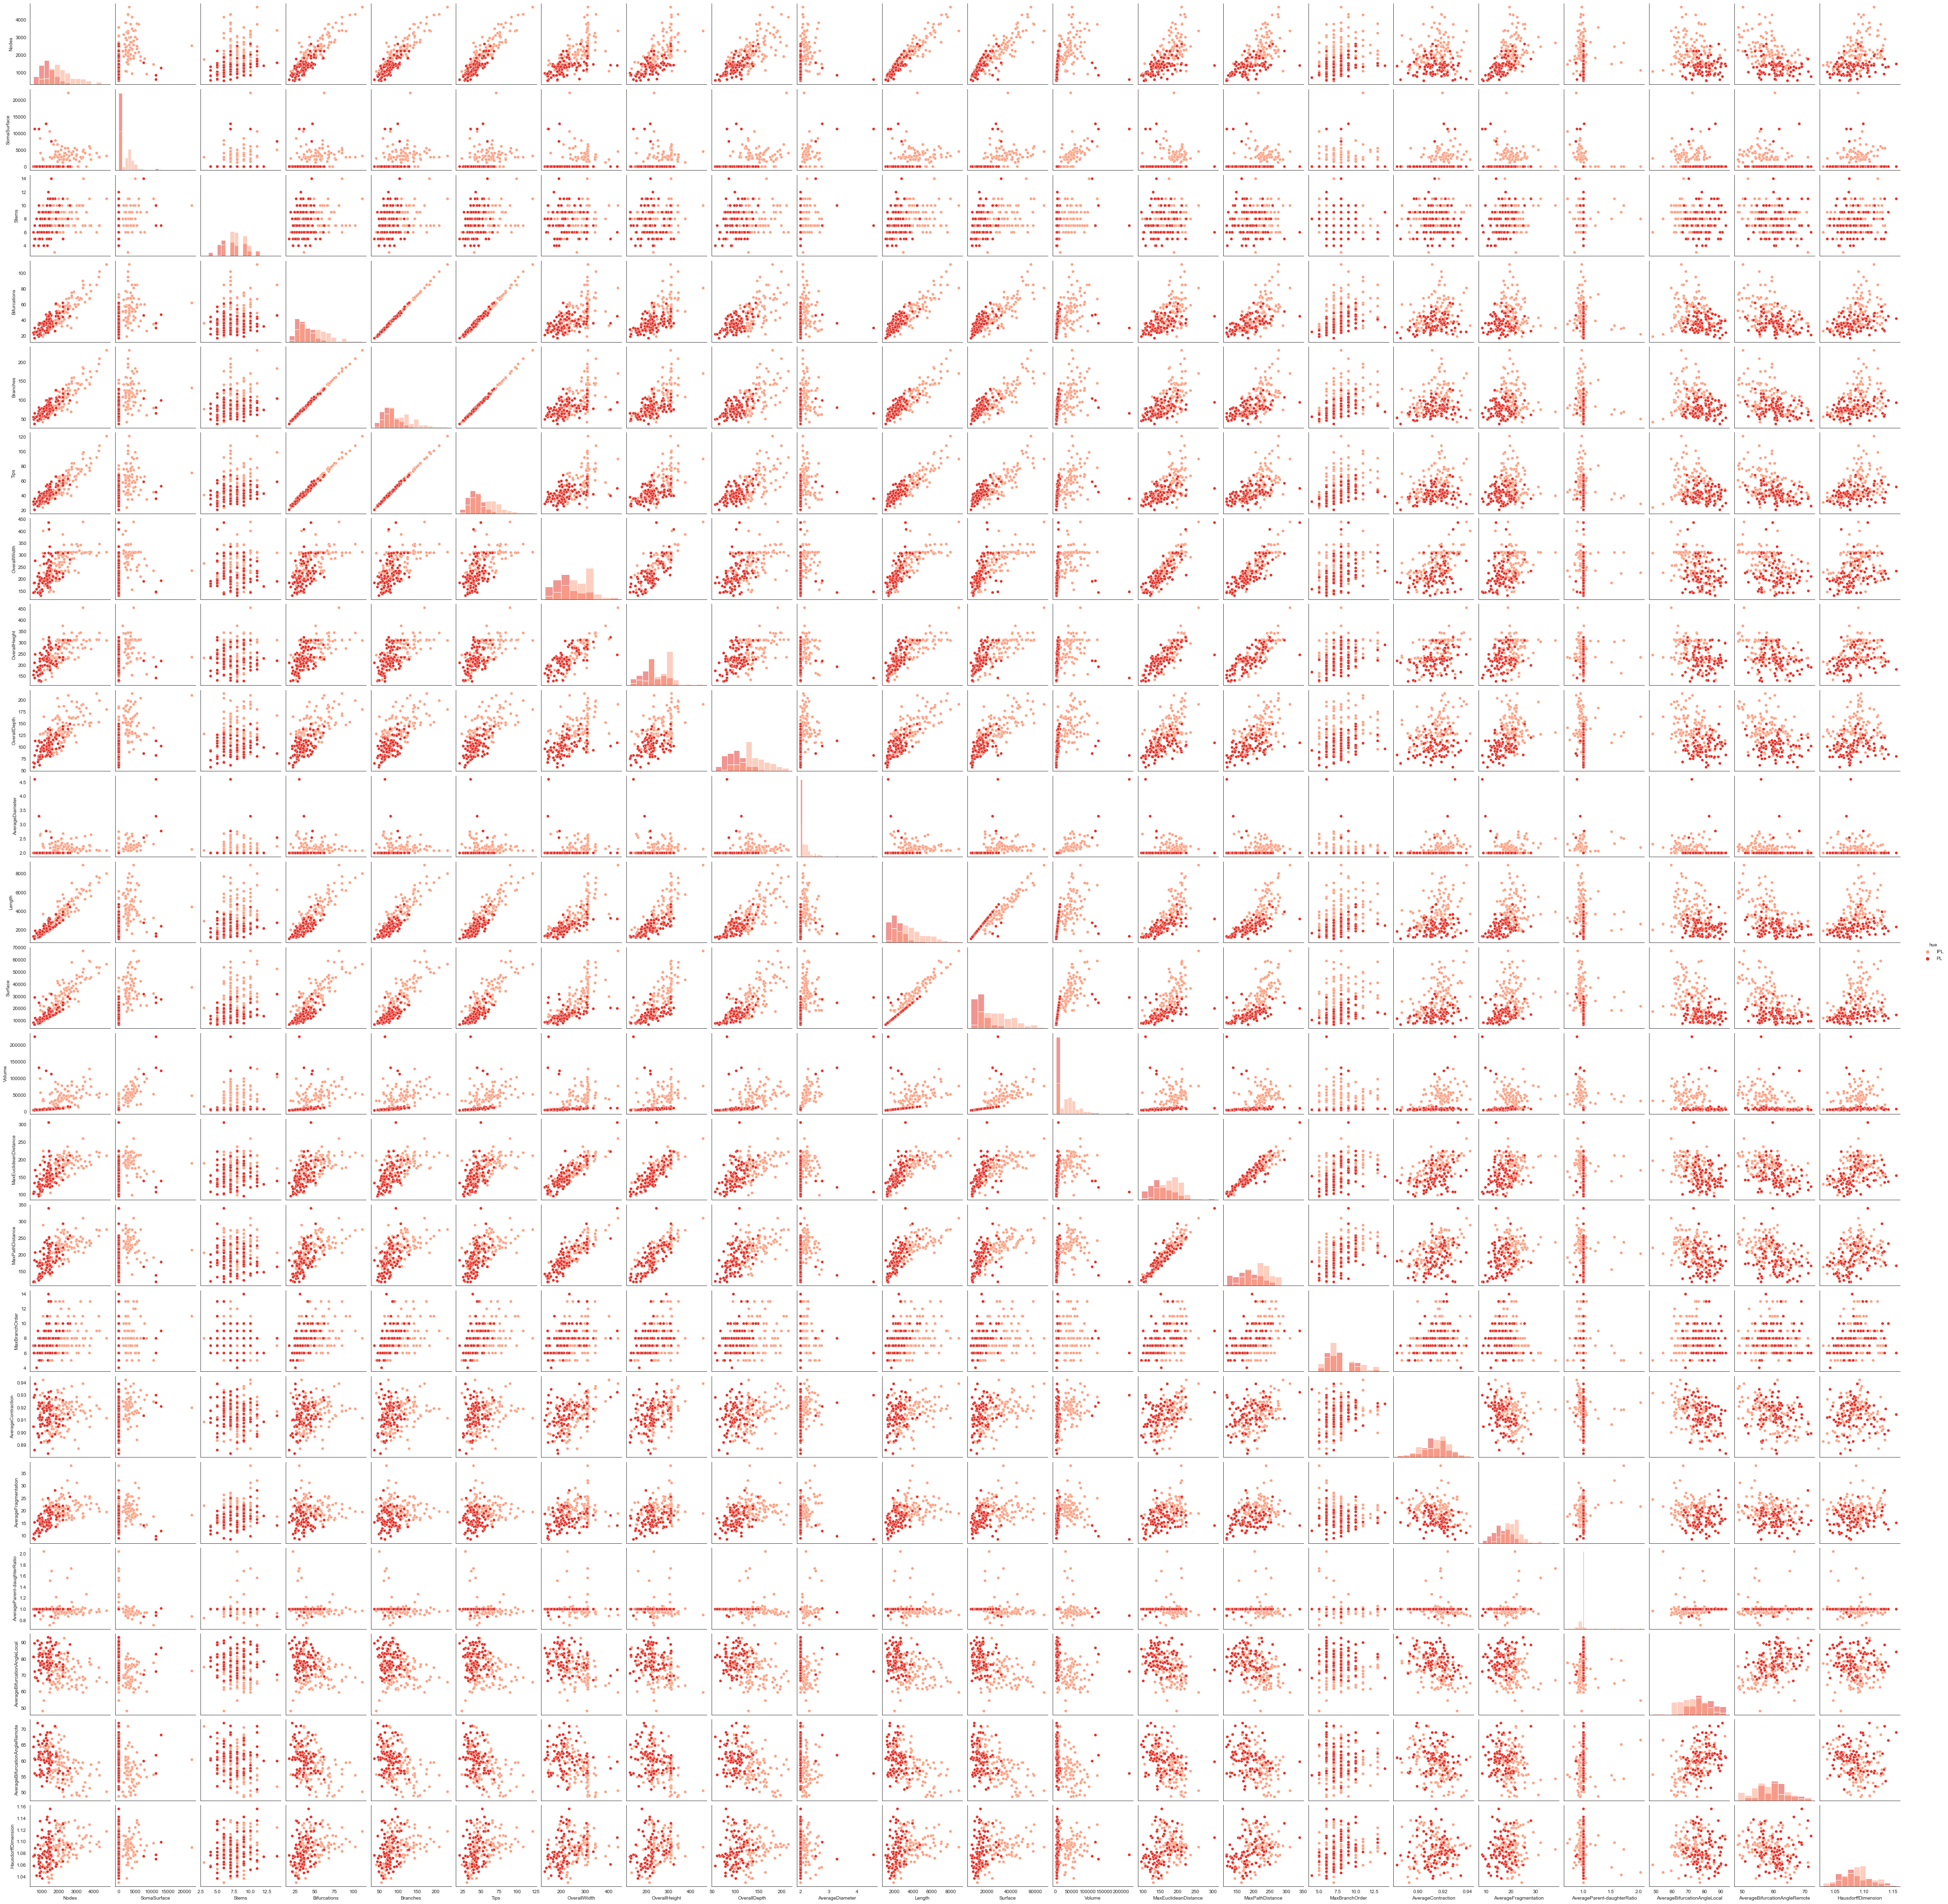

In [152]:
sns.set_style('white')
plt.figure(figsize=(15,15))
sns.pairplot(df, hue='hue', 
             palette='Reds',
#              palette='Set1', 
             diag_kind='hist')
# plt.savefig('./pairplot_raw_'+hue_type+'.png', dpi=200)

In [153]:
# plt.figure(figsize=(15,15))
# sns.pairplot(df_std, hue='hue', palette='Set2', diag_kind='hist')
# plt.savefig('./pairplot_std_'+hue_type+'.png', dpi=200)

In [154]:
my_umap = UMAP(n_components=2,n_neighbors=30, random_state=10, min_dist=0.2)
x_umap = my_umap.fit_transform(x_pca.copy())
figure_df = pd.DataFrame({
    'x_pca':x_pca[:,0], 
    'y_pca':x_pca[:,1],              
    'hue':df['hue'], 
#     'neuron_id':subtype_data.index.tolist()
    })
# figure_df['hue'] = figure_df['hue'].astype(float)
# figure_df
figure_df['x_umap'] = x_umap[:,0]
figure_df['y_umap'] = x_umap[:,1]

In [155]:
figure_df

x_pca     y_pca  hue  \
Name                                                                          
00068_P003_T01-S000_S(M)TG_R0460_WY-20220513_XJ... -0.970925 -1.110420  IPL   
00069_P003_T01-S000_S(M)TG_R0460_WY-20220513_XJ...  4.254577  3.569320  IPL   
00073_P003_T02-S001_STG_R0460_GYC-20220516_GYC_... -2.256642 -0.583212  IPL   
00082_P003_T02-S003_STG_R0460_GYC-20220516_LJ_s... -2.676929 -0.967287  IPL   
00083_P003_T02-S003_STG_R0460_GYC-20220516_LJ_s... -0.960323 -1.062169  IPL   
...                                                      ...       ...  ...   
01698_P018_T01-S014_SPL_R0460_LJ-20220728_YXQ_s... -3.451775  1.367387   PL   
01699_P018_T01-S014_SPL_R0460_LJ-20220728_YXQ_s... -3.249416  0.187857   PL   
01701_P018_T01-S014_SPL_R0460_LJ-20220728_YXQ_s... -3.142573  0.113512   PL   
01738_P018_T01-S029_SPL_R0613_LJ-20220728_YXQ_s...  0.578448 -1.547013   PL   
01745_P018_T01-S029_SPL_R0613_LJ-20220728_YXQ_s... -3.341035  0.251013   PL   

                                                       x_umap    y_umap  
Name                                                                     
00068_P003_T01-S000_S(M)TG_R0460_WY-20220513_XJ...  13.927290  4.086388  
00069_P003_T01-S000_S(M)TG_R0460_WY-20220513_XJ...  10.434134  6.291702  
00073_P003_T02-S001_STG_R0460_GYC-20220516_GYC_...  14.849800  4.088642  
00082_P003_T02-S003_STG_R0460_GYC-20220516_LJ_s...  14.189609  3.297235  
00083_P003_T02-S003_STG_R0460_GYC-20220516_LJ_s...  12.843682  4.283485  
...                                                       ...       ...  
01698_P018_T01-S014_SPL_R0460_LJ-20220728_YXQ_s...  14.679312  2.332669  
01699_P018_T01-S014_SPL_R0460_LJ-20220728_YXQ_s...  14.813687  4.061443  
01701_P018_T01-S014_SPL_R0460_LJ-20220728_YXQ_s...  14.206175  1.849973  
01738_P018_T01-S029_SPL_R0613_LJ-20220728_YXQ_s...  11.626788  3.983724  
01745_P018_T01-S029_SPL_R0613_LJ-20220728_YXQ_s...  14.656878  2.866203  

[203 rows x 5 columns]

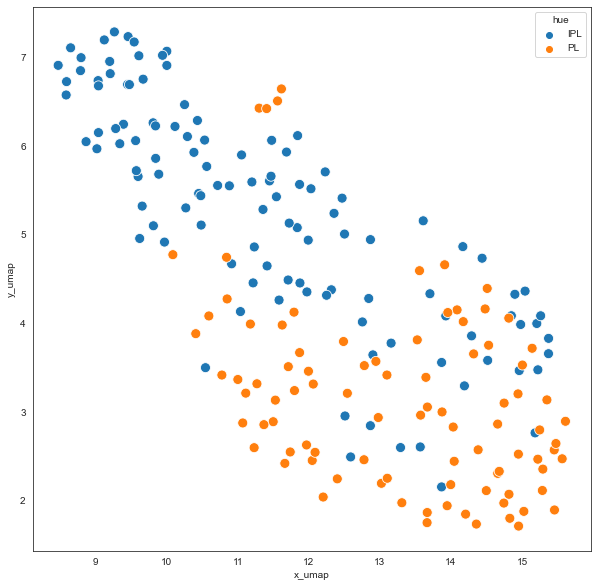

In [156]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=figure_df['x_umap'], y=figure_df['y_umap'], hue=figure_df['hue'],
#                palette='Set1',
              #palette=sns.diverging_palette(240, 10, n=6, as_cmap=True),
               s=100,
#                hue_norm=(-100,100)
               )
plt.savefig('./new_umap_'+hue_type+'.png', dpi=200)

In [157]:
sns.light_palette((260, 75, 60), input="husl")

[(0.9421819918111672, 0.9432266193679569, 0.9498462205167962),
 (0.8469568241944938, 0.8640574828228126, 0.9383849551740686),
 (0.7517316565778204, 0.7848883462776681, 0.9269236898313409),
 (0.6565064889611469, 0.7057192097325238, 0.9154624244886133),
 (0.5612813213444735, 0.6265500731873794, 0.9040011591458855),
 (0.4660561537278001, 0.5473809366422351, 0.8925398938031579)]

In [158]:
#                 'Set1',
sns.diverging_palette(240, 10, n=6, as_cmap=True)

In [113]:
x.shape

(203, 22)

In [114]:
x_umap.shape

(203, 2)

In [115]:
labels

BrainRgn
Name                                                       
00068_P003_T01-S000_S(M)TG_R0460_WY-20220513_XJ...      IPL
00069_P003_T01-S000_S(M)TG_R0460_WY-20220513_XJ...      IPL
00073_P003_T02-S001_STG_R0460_GYC-20220516_GYC_...      IPL
00082_P003_T02-S003_STG_R0460_GYC-20220516_LJ_s...      IPL
00083_P003_T02-S003_STG_R0460_GYC-20220516_LJ_s...      IPL
...                                                     ...
01698_P018_T01-S014_SPL_R0460_LJ-20220728_YXQ_s...       PL
01699_P018_T01-S014_SPL_R0460_LJ-20220728_YXQ_s...       PL
01701_P018_T01-S014_SPL_R0460_LJ-20220728_YXQ_s...       PL
01738_P018_T01-S029_SPL_R0613_LJ-20220728_YXQ_s...       PL
01745_P018_T01-S029_SPL_R0613_LJ-20220728_YXQ_s...       PL

[203 rows x 1 columns]

In [116]:
print('umap layout下的聚类评价')
print(metrics.silhouette_score(x_umap, labels, metric='euclidean')) # -1, +1 （越高越好）
print(metrics.calinski_harabasz_score(x_umap, labels, )) # 0, +无穷 （越接近0越好）
print(metrics.davies_bouldin_score(x_umap, labels, )) # 0， +无穷 （越接近0越好）

umap layout下的聚类评价
0.2354205
82.68960512161824
1.363867826655007


D:\Anconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\Anconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\Anconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [117]:
print('pca layout下的聚类评价')
print(metrics.silhouette_score(x_pca, labels, metric='euclidean')) # -1, +1 （越高越好）
print(metrics.calinski_harabasz_score(x_pca, labels, )) # 0, +无穷 （越接近0越好）
print(metrics.davies_bouldin_score(x_pca, labels, )) # 0， +无穷 （越接近0越好）

pca layout下的聚类评价
0.12833949349717338
37.432506579210106
2.118118993070378


D:\Anconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\Anconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\Anconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
